<a href="https://colab.research.google.com/github/cyp-ark/semisupervisedlearning/blob/main/pi_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from keras.datasets import cifar10

import keras.backend as K

In [3]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
img_input = keras.Input(shape=(32,32,3))
aug_input = layers.GaussianNoise(stddev = 0.15)(img_input)

In [5]:
x1 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(512,(3,3),padding="valid")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.GlobalAveragePooling2D()(x1)
output1 = layers.Dense(10, activation = "Softmax")(x1)

In [6]:
x2 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(512,(3,3),padding="valid")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.GlobalAveragePooling2D()(x2)
output2 = layers.Dense(10, activation = "Softmax")(x2)

#output2 = layers.subtract([x2,output1],name="z_hat")

In [7]:
model = keras.Model(inputs=img_input, outputs = [output1, output2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 32, 32, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 128)  3584        ['gaussian_noise[0][0]']         
                                                                                                  
 conv2d_9 (Conv2D)              (None, 32, 32, 128)  3584        ['gaussian_noise[0][0]']         
                                                                                              

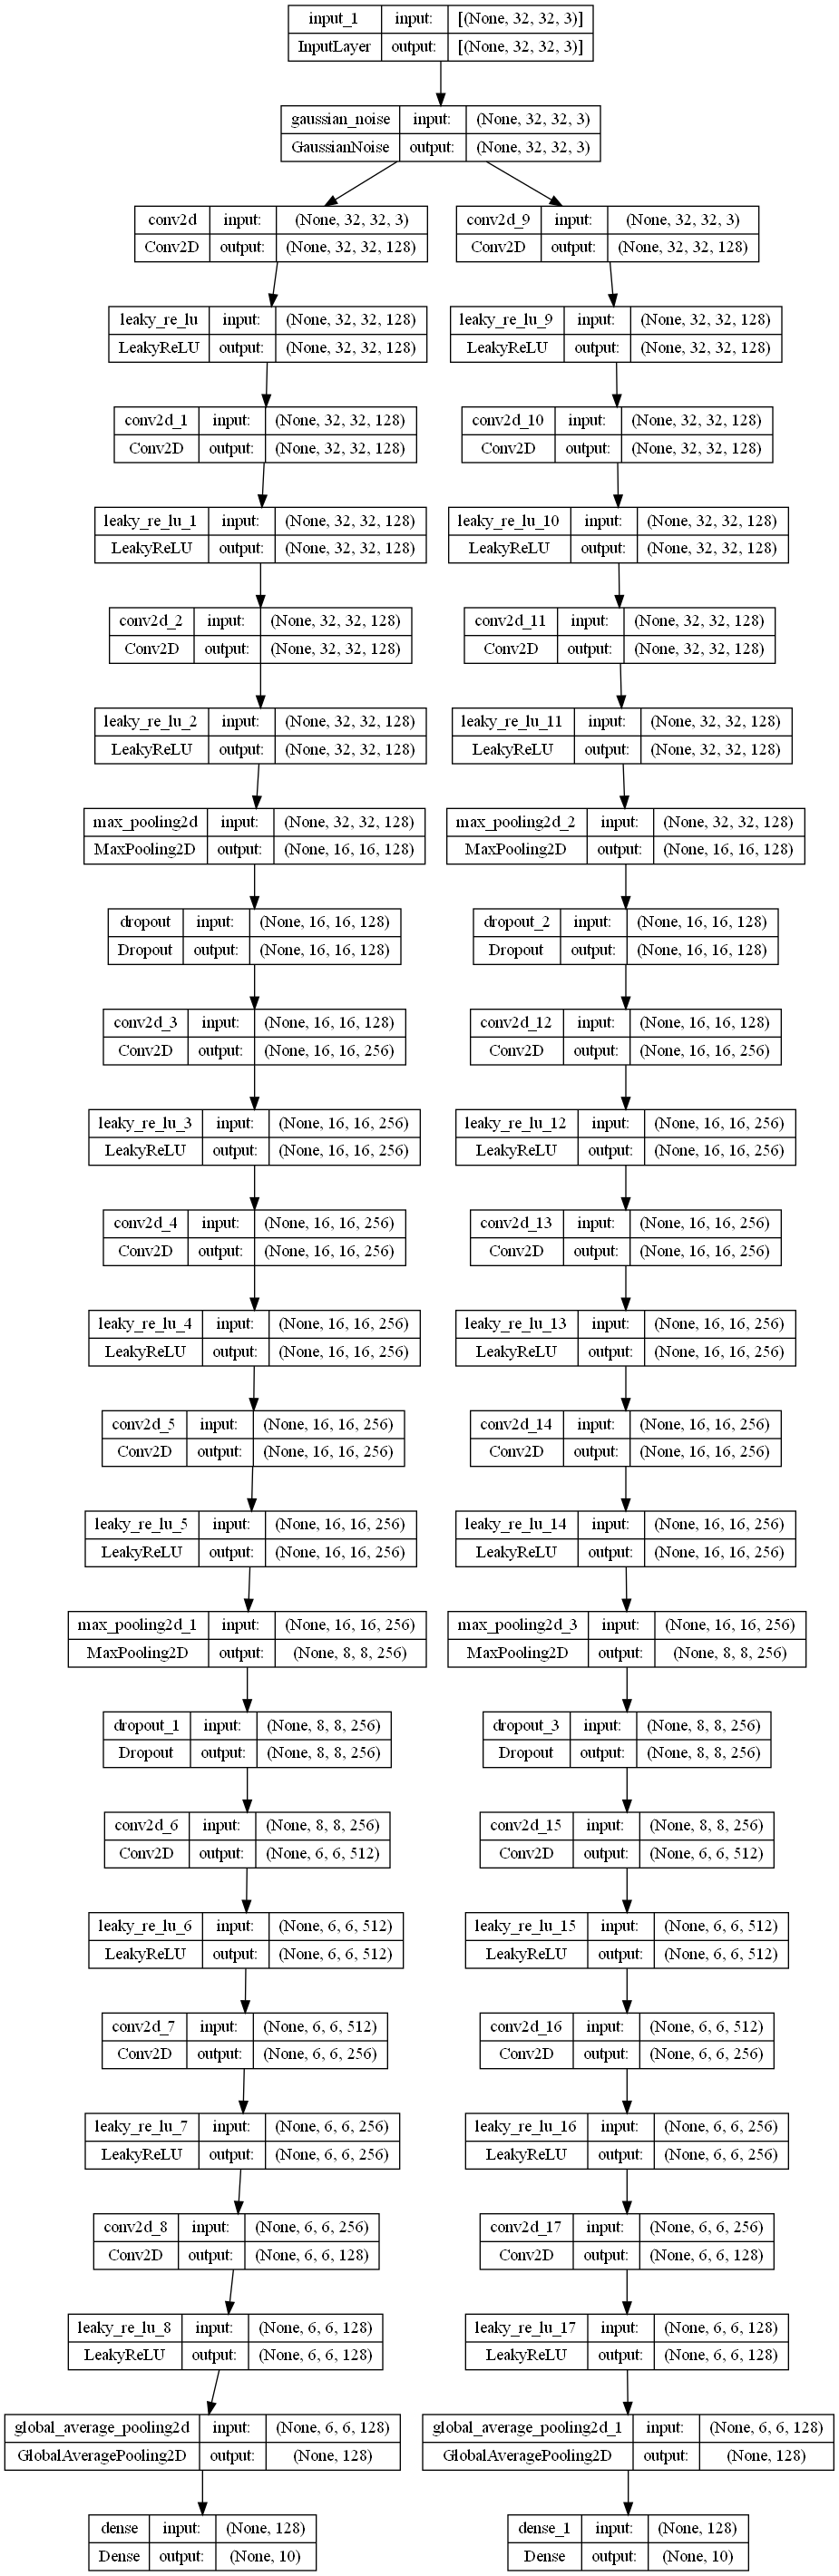

In [8]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [9]:
from tensorflow.keras import losses
def pi_model_loss(y_true,y_pred):
  const = K.cast(K.all(K.equal(K.sum(y_true),0)),"float32")
  return const * K.l2_normalize(y_pred)  + (1 - const) * y_pred

In [10]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.003),
    loss=pi_model_loss
    #loss = keras.losses.CategoricalCrossentropy()
)


history = model.fit(X_train, y_train, batch_size=300, epochs=3)

test_scores = model.evaluate(X_test,y_test,verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/3


In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
K.less()

In [23]:
a = 1
b = 0

In [24]:
K.print_tensor(K.equal(a,b))

 0


<tf.Tensor: shape=(), dtype=bool, numpy=False>

In [26]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
y_pre = tf.constant([0.1,0.5,0.6,0.1,0,0,0,0,0,0])

In [70]:
y_zero = tf.constant([0,0,0,0,0,0,0,0,0.1,0])

In [35]:
K.equal(y_zero,y_test[0])

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True])>

In [60]:
K.Sum(model.predict(X_test[0].reshape(-1,32,32,3))[0],y_test[0])

AttributeError: ignored

In [51]:
y_train[0] = [0,0,0,0,0,0,0,0,0,0]

In [52]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
import random
idx_0 = np.random.choice(range(50000),45000)

In [22]:
y_train[idx_0] = [0,0,0,0,0,0,0,0,0,0]

In [1]:
y_test[0]

NameError: ignored

In [54]:
a = y_train[0]

K.print_tensor(
    
    K.cast(K.all(K.equal(a,y_zero)),"float32")

    )

 0


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
K.print_tensor(
K.cast(K.all(K.equal(y_test[0],y_zero)),"float32")
)

 0


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [72]:
K.print_tensor(
    K.dot(y_pre,K.transpose(y_zero))
)

InvalidArgumentError: ignored

In [87]:
a = tf.constant([[1,5]])
b = tf.constant([[7.5,8]])

K.print_tensor(
K.l2_normalize(b)
)

 [[0.683941126 0.729537189]]


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.6839411, 0.7295372]], dtype=float32)>